In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing  import  scale
from sklearn.decomposition  import PCA
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os

In [7]:
train_data = pd.read_csv("/home/linux-partition/Desktop/SVM/dataset13.csv") #reading the csv files using pandas


In [8]:
train_data.isnull().sum().head(10)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
dtype: int64

In [9]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer,normalize
y = train_data['price_range']
X = train_data.drop(columns='price_range')
scaler=MinMaxScaler()
normalizedX = scaler.fit_transform(X)
X =pd.DataFrame(normalizedX)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [11]:
X_scaled=scale(X)


In [12]:
X_scaled1 =pd.DataFrame(X_scaled)
X_scaled1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=10)

accuracy: 0.96 



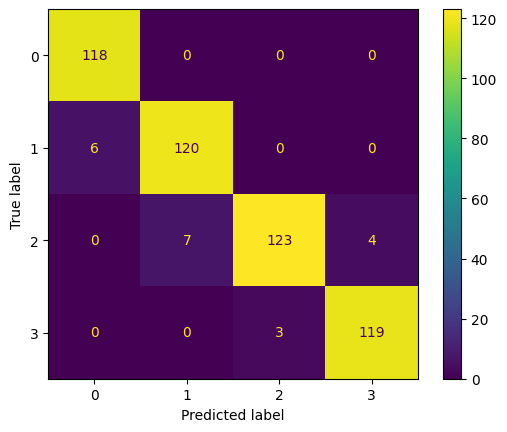

In [15]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

accuracy: 0.872 



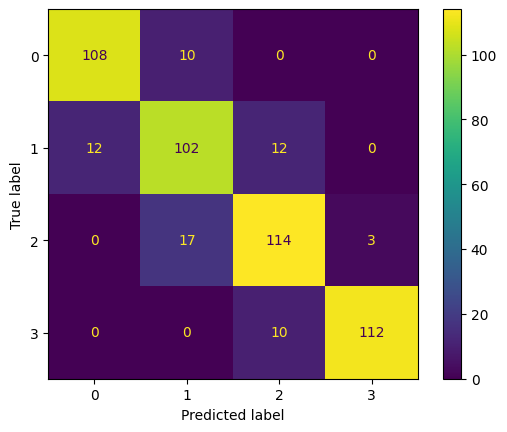

In [16]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred = rbf_svm.predict(X_test)
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [30]:
param_grid = [ {
    'C' :[0.5 , 1 ,4,6,10],
    "gamma" : ['scale',0.01,0.001,0.0001],
    'kernel' :['rbf']},
                ]

model = SVC(kernel="rbf")

optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -5,
    return_train_score=True
)
optimal_parameters.fit(X_train,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=0.5, gamma=scale, kernel=rbf.............................
[CV 2/5; 1/20] START C=0.5, gamma=scale, kernel=rbf.............................
[CV 3/5; 1/20] START C=0.5, gamma=scale, kernel=rbf.............................
[CV 4/5; 1/20] START C=0.5, gamma=scale, kernel=rbf.............................
[CV 5/5; 1/20] START C=0.5, gamma=scale, kernel=rbf.............................
[CV 1/5; 2/20] START C=0.5, gamma=0.01, kernel=rbf..............................
[CV 2/5; 2/20] START C=0.5, gamma=0.01, kernel=rbf..............................
[CV 3/5; 2/20] START C=0.5, gamma=0.01, kernel=rbf..............................
[CV 4/5; 2/20] START C=0.5, gamma=0.01, kernel=rbf..............................
[CV 5/5; 2/20] START C=0.5, gamma=0.01, kernel=rbf..............................
[CV 1/5; 3/20] START C=0.5, gamma=0.001, kernel=rbf.............................
[CV 2/5; 3/20] START C=0.5, gamma=0.001, kernel

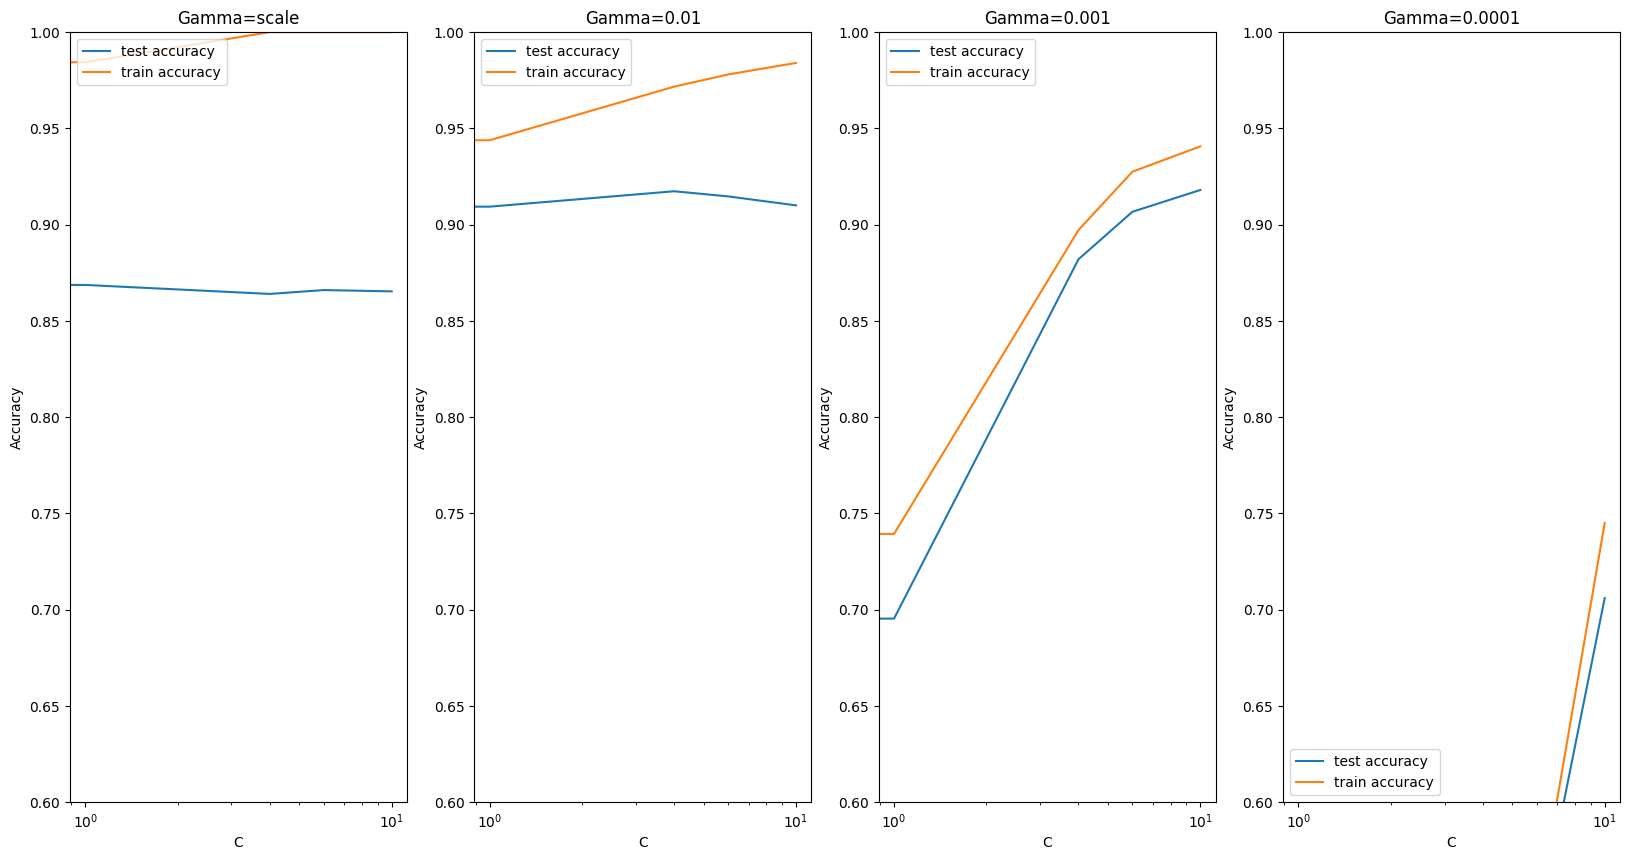

In [32]:
cv_results = pd.DataFrame(optimal_parameters.cv_results_)

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,10))

# subplot 1/3
plt.subplot(141)
gamma_scale = cv_results[cv_results['param_gamma']=='scale']

plt.plot(gamma_scale["param_C"], gamma_scale["mean_test_score"])
plt.plot(gamma_scale["param_C"], gamma_scale["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=scale")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(142)
gamma_001 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(143)
gamma_5 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_5["param_C"], gamma_5["mean_test_score"])
plt.plot(gamma_5["param_C"], gamma_5["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(144)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale('log')


train accuracy:  0.944 

accuracy: 0.926 



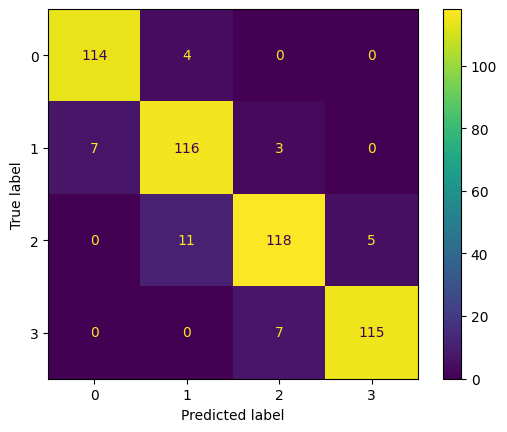

In [21]:
rbf_svm_better = SVC(C=10, gamma=0.001,kernel='rbf')
rbf_svm_better.fit(X_train, y_train)
y_pred_test = rbf_svm_better.predict(X_test)
y_pred_train = rbf_svm_better.predict(X_train)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.722 

Test accuracy: 0.436 



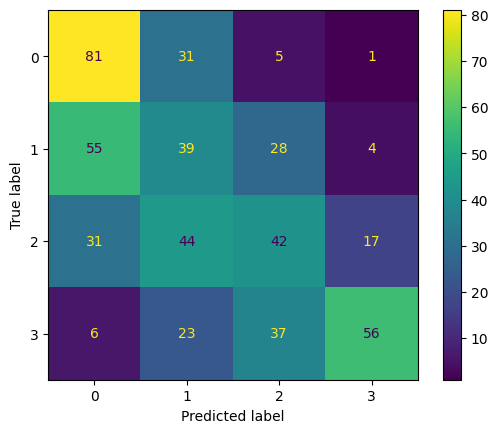

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_test = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [23]:
model= KNeighborsClassifier()
param_grid = [{'n_neighbors': np.arange(1, 30)}]
optimal_parameters =GridSearchCV(
    model, param_grid,
    cv=5,
    scoring= 'accuracy',
    verbose=10,
    n_jobs= -1,
    return_train_score=True
)
optimal_parameters.fit(X_train,y_train)

print(optimal_parameters.best_params_)
print(optimal_parameters.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5; 1/29] START n_neighbors=1..............................................
[CV 4/5; 1/29] START n_neighbors=1..............................................
[CV 2/5; 1/29] START n_neighbors=1..............................................
[CV 3/5; 1/29] START n_neighbors=1..............................................
[CV 1/5; 2/29] START n_neighbors=2..............................................
[CV 2/5; 2/29] START n_neighbors=2..............................................
[CV 5/5; 1/29] START n_neighbors=1..............................................
[CV 3/5; 2/29] START n_neighbors=2..............................................
[CV 4/5; 2/29] START n_neighbors=2..............................................
[CV 5/5; 2/29] START n_neighbors=2..............................................
[CV 2/5; 3/29] START n_neighbors=3..............................................
[CV 1/5; 3/29] START n_neighbors=3.............

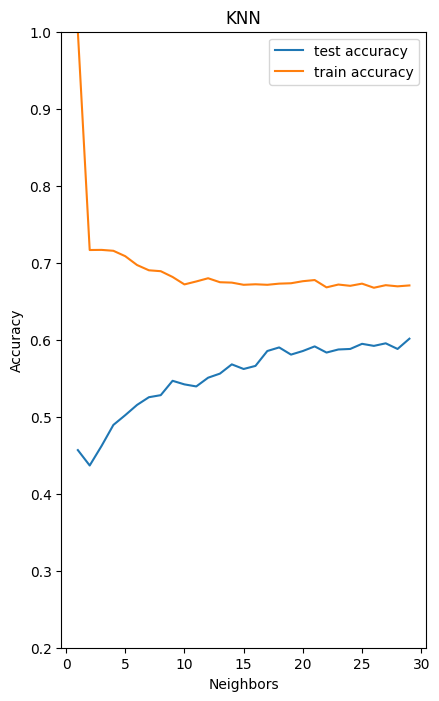

In [28]:
cv_results = pd.DataFrame(optimal_parameters.cv_results_)
# print(cv_results)
# # converting C to numeric type for plotting on x-axis
cv_results['param_n_neighbors']=cv_results['param_n_neighbors'].astype('int')
plt.figure(figsize=(16,8))

plt.subplot(131)
plt.plot(cv_results["param_n_neighbors"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_neighbors"], cv_results["mean_train_score"])
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title("KNN")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.show()

Train accuracy:  0.6766666666666666 

Test accuracy: 0.63 



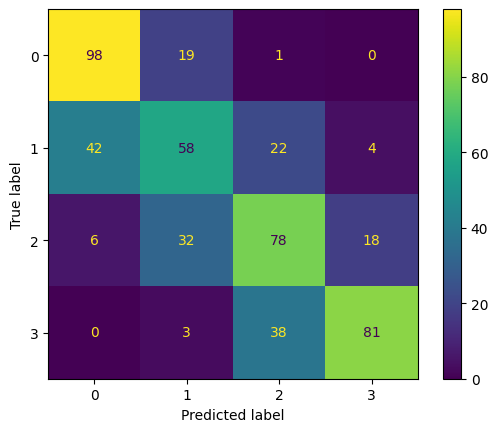

In [26]:
from sklearn.neighbors import KNeighborsClassifier
faster_knn_model =KNeighborsClassifier(n_neighbors=29)
faster_knn_model.fit(X_train, y_train)
y_pred_test = faster_knn_model.predict(X_test)
y_pred_train = faster_knn_model.predict(X_train)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy:  0.7353333333333333 

Test accuracy: 0.7 

Test Set Score : 70.0 %


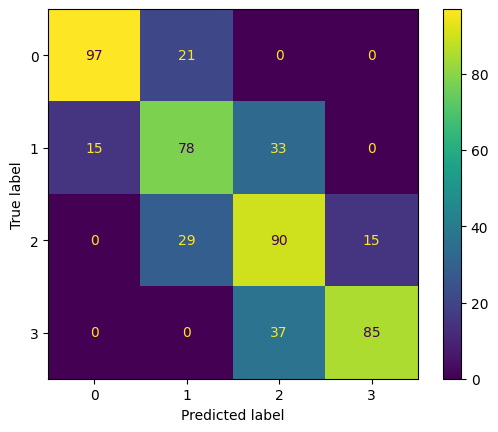

In [27]:
from sklearn.neighbors import NearestCentroid

ncc_model = NearestCentroid()
ncc_model.fit(X_train, y_train)
y_pred_test = ncc_model.predict(X_test)
y_pred_train = ncc_model.predict(X_train)
print("Train accuracy: ",metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train),"\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
print(f"Test Set Score : {ncc_model.score(X_test, y_test) * 100} %")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()